In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline

In [57]:
# make data
X,y = datasets.make_regression(n_samples=250, n_features=1, noise=20,random_state=0,bias=50)
print(X.shape)
print(y.shape)
print(X[:5,])
print(y[:5,])
print('----------------------------------')
y= y.reshape(-1,1) #这里的reshape至关重要,否则下面THETA在减去grad之后会被广播成(2,2)的格式
print(y.shape)
print(y[:5,])
#将完整的数据集切割成训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=0)
#构造同样多行,1列的元素1矩阵
o_train = np.ones([X_train.shape[0],1],dtype=X_train.dtype)
o_test = np.ones([X_test.shape[0],1],dtype=X_test.dtype)
# print(o_train.shape)
# print(o_test.shape)
#将1矩阵与原矩阵按列合并(axis=1,按列合并)
X_train = np.concatenate((o_train,X_train),axis=1)
X_test = np.concatenate((o_test,X_test),axis=1)
print(X_train.shape)
print(y_train.shape)
print(y_train.shape)

(250, 1)
(250,)
[[ 1.84926373]
 [-0.82643854]
 [ 0.94942081]
 [-1.10438334]
 [-1.00021535]]
[49.16015959  4.72868339 76.76694682 27.2535895  53.8727809 ]
----------------------------------
(250, 1)
[[49.16015959]
 [ 4.72868339]
 [76.76694682]
 [27.2535895 ]
 [53.8727809 ]]
(175, 2)
(175, 1)
(175, 1)


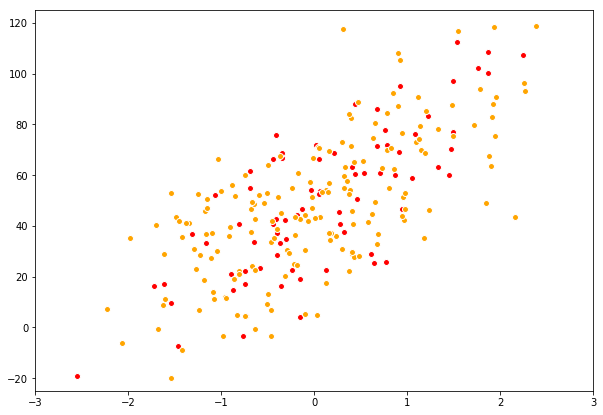

In [58]:
#show data
plt.figure(figsize=(10,7))
plt.ylim((-25,125)) #设置坐标范围
plt.xlim(-3,3)
plt.scatter(X_test[:,1],y_test,c='red',edgecolors='white')
plt.scatter(X_train[:,1],y_train,c='orange',edgecolors='white')



In [85]:
THETA = np.zeros([2,1],dtype=np.float32)
#learning rate
lr = 0.00012
step =200
for i in range(step):
    #XTXw-XTy
    grad = np.matmul(np.matmul(X_train.T,X_train),THETA) - np.matmul(X_train.T,y_train) 
    
#     print(grad)
#     print("第一次:",THETA.shape)
    THETA  = THETA - lr*grad
#     print("第二次:",THETA.shape)
#     a = np.dot(X_train,THETA)
#     print(X_train.shape)
#     print(a.shape)
    if i%5==0:
        loss = np.sqrt(np.sum(  (np.dot(X_train,THETA)-y_train)**2))
        print(loss)
print('梯度下降法找到的THETA',THETA)
theta_1 = np.dot(np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), X_train.T), y_train)
print('解析计算出来的',theta_1)
    

714.8322300762284
652.9907917848402
598.3817800661698
550.3214413622329
508.1860835712113
471.4032833881205
439.4442515142034
411.81756296959264
388.0644261340145
367.7555619468082
350.4896062322915
335.89276985511
323.6193438775554
313.3525649302207
304.8053795985539
297.72075334832374
291.87132246981463
287.0583428503184
283.1100128776624
279.87932317046364
277.24161383391015
275.09201182474567
273.342891434727
271.921462868561
270.76755648822257
269.83163854384924
269.07306998089916
268.4586030832007
267.9611001594687
267.5584527564349
267.23267758975555
266.96916535779025
266.7560599510347
266.58374765362885
266.444438323244
266.3318229593668
266.24079436736804
266.1672197127621
266.1077556021188
266.059697919866
梯度下降法找到的THETA [[47.04174538]
 [18.07717878]]
解析计算出来的 [[47.72337045]
 [18.30513929]]
